In [1]:
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarn

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
from keras.datasets import fashion_mnist, mnist

In [34]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [35]:
x_train.shape


(60000, 28, 28)

In [36]:
y_train.shape


(60000,)

In [37]:
x_test.shape


(10000, 28, 28)

In [38]:
y_test.shape

(10000,)

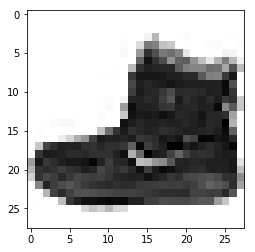

In [39]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [40]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [41]:
x_train = x_train/255
x_test = x_test/255

In [42]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [44]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [47]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 178us/step - loss: 0.4876 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.3626 - acc: 0.8672
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.3276 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.3097 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.2898 - acc: 0.8925


In [48]:
model.save("fashion.model")

In [49]:
_model = keras.models.load_model("fashion.model")

In [50]:
_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 81us/step


[0.37204943860769274, 0.8612]

In [51]:
predictions = _model.predict([x_test])

In [52]:
predictions[0]

array([3.3807792e-05, 3.8020440e-05, 5.2914452e-06, 7.3711851e-07,
       3.0010617e-06, 1.1370818e-02, 7.6240271e-06, 4.4659628e-03,
       3.8375965e-06, 9.8407090e-01], dtype=float32)

In [53]:
import numpy as np

In [58]:
np.argmax(predictions[37])

5

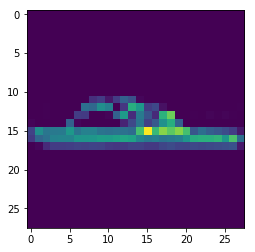

In [59]:
plt.imshow(x_test[37])